SOAL VARIABEL RANDOM DISKRIT
Tiga koin yang seimbang dilempar bersamaan.
X = jumlah sisi Gambar (Tail) yang muncul
Tentukan: PDF, CDF, dan P(X ≤ 2)

PERHITUNGAN MANUAL

1. Ruang Sampel (H=Head, T=Tail):
   S = ['HHH', 'HHT', 'HTH', 'HTT', 'THH', 'THT', 'TTH', 'TTT']
   Total kemungkinan = 2³ = 8

2. Nilai X yang mungkin:
   X = {0, 1, 2, 3}

3. Menghitung PMF secara manual:
   Menggunakan distribusi binomial: P(X=k) = C(n,k) × p^k × (1-p)^(n-k)
   Dimana: n=3 (jumlah koin), p=0.5 (peluang Tail)

   P(X=0) = C(3,0) × 0.5^0 × 0.5^3
          = 1 × 1.000 × 0.125
          = 0.1250 = 1/8

   P(X=1) = C(3,1) × 0.5^1 × 0.5^2
          = 3 × 0.500 × 0.250
          = 0.3750 = 3/8

   P(X=2) = C(3,2) × 0.5^2 × 0.5^1
          = 3 × 0.250 × 0.500
          = 0.3750 = 3/8

   P(X=3) = C(3,3) × 0.5^3 × 0.5^0
          = 1 × 0.125 × 1.000
          = 0.1250 = 1/8

4. Menghitung CDF secara manual:
   F(0) = P(X ≤ 0) = 0.1250
   F(1) = P(X ≤ 1) = 0.5000
   F(2) = P(X ≤ 2) = 0.8750
   F(3) = P(X ≤ 3)

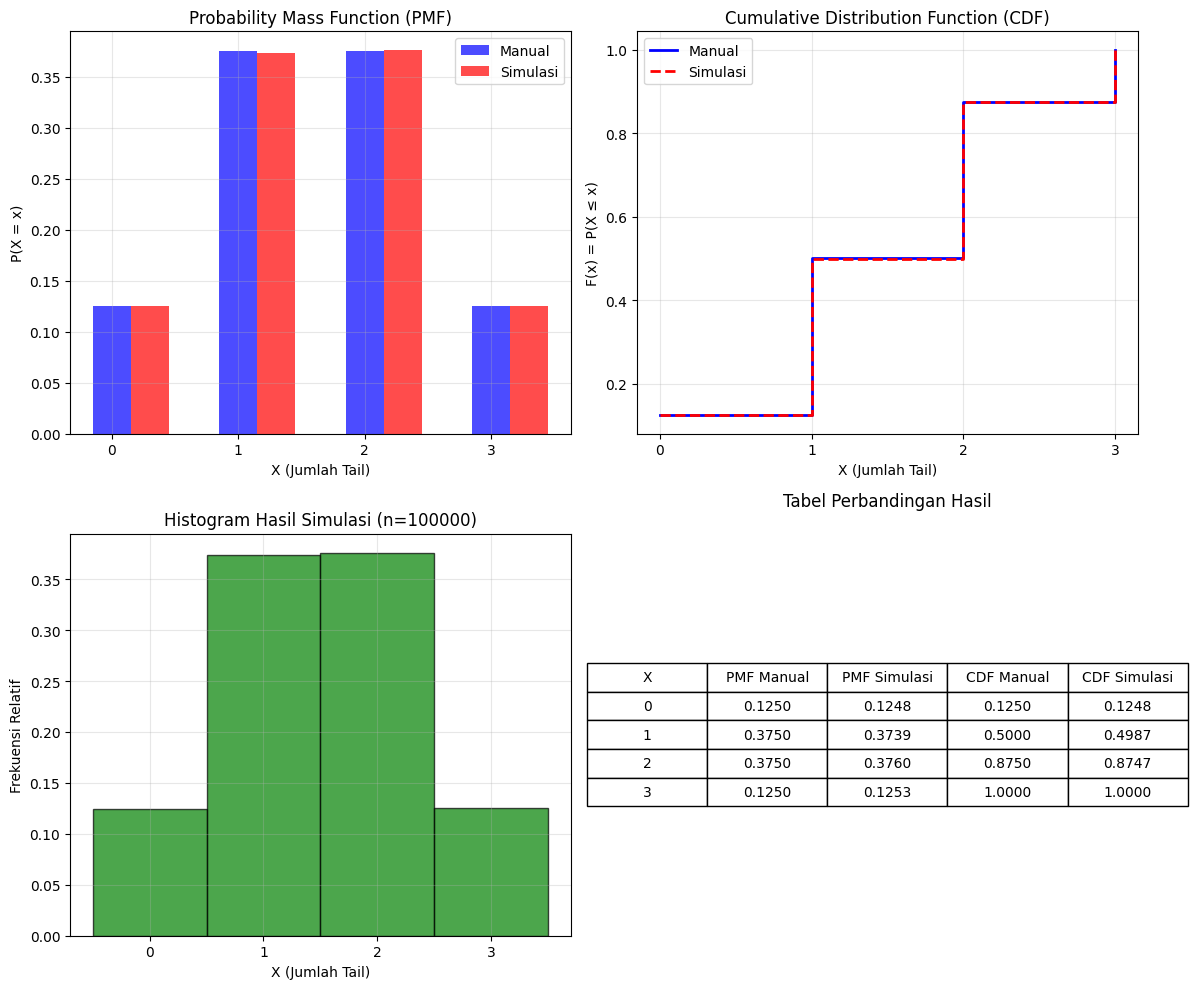


KESIMPULAN
1. Hasil perhitungan manual dan simulasi Python sangat dekat
2. Perbedaan kecil terjadi karena simulasi menggunakan sampling
3. Semakin banyak simulasi, hasil akan semakin mendekati nilai teoritis
4. Distribusi mengikuti distribusi binomial dengan n=3, p=0.5


In [2]:
# VARIABEL RANDOM DISKRIT - PELEMPARAN KOIN
# Soal: Tiga koin yang seimbang dilempar bersamaan.
# X = jumlah sisi Gambar (Tail) yang muncul
# Tentukan PDF, CDF, dan P(X ≤ 2)

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
import pandas as pd

print("=" * 60)
print("SOAL VARIABEL RANDOM DISKRIT")
print("=" * 60)
print("Tiga koin yang seimbang dilempar bersamaan.")
print("X = jumlah sisi Gambar (Tail) yang muncul")
print("Tentukan: PDF, CDF, dan P(X ≤ 2)")
print()

# 1. PERHITUNGAN MANUAL
print("=" * 60)
print("PERHITUNGAN MANUAL")
print("=" * 60)

# Ruang sampel untuk 3 koin
print("\n1. Ruang Sampel (H=Head, T=Tail):")
ruang_sampel = ["HHH", "HHT", "HTH", "HTT", "THH", "THT", "TTH", "TTT"]
print(f"   S = {ruang_sampel}")
print(f"   Total kemungkinan = 2³ = 8")

# Nilai-nilai X yang mungkin
print("\n2. Nilai X yang mungkin:")
print("   X = {0, 1, 2, 3}")

# Menghitung PMF (Probability Mass Function)
print("\n3. Menghitung PMF secara manual:")
print("   Menggunakan distribusi binomial: P(X=k) = C(n,k) × p^k × (1-p)^(n-k)")
print("   Dimana: n=3 (jumlah koin), p=0.5 (peluang Tail)")
print()

n = 3  # jumlah koin
p = 0.5  # peluang mendapat Tail pada satu koin
X_values = [0, 1, 2, 3]
pmf_manual = []

for k in X_values:
    # Hitung kombinasi C(n,k)
    kombinasi = comb(n, k, exact=True)
    # Hitung probabilitas
    prob = kombinasi * (p**k) * ((1 - p) ** (n - k))
    pmf_manual.append(prob)

    print(f"   P(X={k}) = C(3,{k}) × 0.5^{k} × 0.5^{3 - k}")
    print(f"          = {kombinasi} × {p**k:.3f} × {(1 - p) ** (n - k):.3f}")
    print(f"          = {prob:.4f} = {kombinasi}/8")
    print()

# Menghitung CDF (Cumulative Distribution Function)
print("4. Menghitung CDF secara manual:")
cdf_manual = []
cumulative = 0
for i, prob in enumerate(pmf_manual):
    cumulative += prob
    cdf_manual.append(cumulative)
    print(f"   F({X_values[i]}) = P(X ≤ {X_values[i]}) = {cumulative:.4f}")

# Menghitung P(X ≤ 2)
print(f"\n5. P(X ≤ 2) = F(2) = {cdf_manual[2]:.4f}")

# 2. IMPLEMENTASI PYTHON
print("\n" + "=" * 60)
print("IMPLEMENTASI PYTHON")
print("=" * 60)

# Simulasi dengan numpy
print("\n1. Simulasi dengan 100,000 percobaan:")
np.random.seed(42)
n_simulations = 100000
hasil_simulasi = []

for _ in range(n_simulations):
    # Lempar 3 koin (1 = Tail, 0 = Head)
    lemparan = np.random.randint(0, 2, size=3)
    jumlah_tail = np.sum(lemparan)
    hasil_simulasi.append(jumlah_tail)

hasil_simulasi = np.array(hasil_simulasi)

# Hitung PMF dari simulasi
print("\n2. PMF dari simulasi:")
pmf_simulasi = []
for k in X_values:
    prob = np.sum(hasil_simulasi == k) / n_simulations
    pmf_simulasi.append(prob)
    print(f"   P(X={k}) = {prob:.4f}")

# Hitung CDF dari simulasi
print("\n3. CDF dari simulasi:")
cdf_simulasi = []
for k in X_values:
    prob = np.sum(hasil_simulasi <= k) / n_simulations
    cdf_simulasi.append(prob)
    print(f"   F({k}) = P(X ≤ {k}) = {prob:.4f}")

# P(X ≤ 2) dari simulasi
prob_x_le_2 = np.sum(hasil_simulasi <= 2) / n_simulations
print(f"\n4. P(X ≤ 2) dari simulasi = {prob_x_le_2:.4f}")

# 3. PERBANDINGAN HASIL
print("\n" + "=" * 60)
print("PERBANDINGAN HASIL")
print("=" * 60)

df_comparison = pd.DataFrame(
    {
        "X": X_values,
        "PMF Manual": pmf_manual,
        "PMF Simulasi": pmf_simulasi,
        "Selisih PMF": [abs(m - s) for m, s in zip(pmf_manual, pmf_simulasi)],
        "CDF Manual": cdf_manual,
        "CDF Simulasi": cdf_simulasi,
        "Selisih CDF": [abs(m - s) for m, s in zip(cdf_manual, cdf_simulasi)],
    }
)

print("\nTabel Perbandingan:")
print(df_comparison.to_string(index=False))

print(f"\nP(X ≤ 2):")
print(f"  Manual   : {cdf_manual[2]:.4f}")
print(f"  Simulasi : {prob_x_le_2:.4f}")
print(f"  Selisih  : {abs(cdf_manual[2] - prob_x_le_2):.4f}")

# 4. VISUALISASI
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot PMF
axes[0, 0].bar(X_values, pmf_manual, width=0.3, label="Manual", alpha=0.7, color="blue")
axes[0, 0].bar(
    [x + 0.3 for x in X_values],
    pmf_simulasi,
    width=0.3,
    label="Simulasi",
    alpha=0.7,
    color="red",
)
axes[0, 0].set_xlabel("X (Jumlah Tail)")
axes[0, 0].set_ylabel("P(X = x)")
axes[0, 0].set_title("Probability Mass Function (PMF)")
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(X_values)

# Plot CDF
axes[0, 1].step(
    X_values, cdf_manual, where="post", label="Manual", linewidth=2, color="blue"
)
axes[0, 1].step(
    X_values,
    cdf_simulasi,
    where="post",
    label="Simulasi",
    linewidth=2,
    color="red",
    linestyle="--",
)
axes[0, 1].set_xlabel("X (Jumlah Tail)")
axes[0, 1].set_ylabel("F(x) = P(X ≤ x)")
axes[0, 1].set_title("Cumulative Distribution Function (CDF)")
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(X_values)

# Histogram hasil simulasi
axes[1, 0].hist(
    hasil_simulasi,
    bins=[-0.5, 0.5, 1.5, 2.5, 3.5],
    density=True,
    alpha=0.7,
    color="green",
    edgecolor="black",
)
axes[1, 0].set_xlabel("X (Jumlah Tail)")
axes[1, 0].set_ylabel("Frekuensi Relatif")
axes[1, 0].set_title(f"Histogram Hasil Simulasi (n={n_simulations})")
axes[1, 0].set_xticks(X_values)
axes[1, 0].grid(True, alpha=0.3)

# Tabel perbandingan
axes[1, 1].axis("tight")
axes[1, 1].axis("off")
table_data = []
table_data.append(["X", "PMF Manual", "PMF Simulasi", "CDF Manual", "CDF Simulasi"])
for i in range(len(X_values)):
    table_data.append(
        [
            f"{X_values[i]}",
            f"{pmf_manual[i]:.4f}",
            f"{pmf_simulasi[i]:.4f}",
            f"{cdf_manual[i]:.4f}",
            f"{cdf_simulasi[i]:.4f}",
        ]
    )
table = axes[1, 1].table(cellText=table_data, cellLoc="center", loc="center")
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
axes[1, 1].set_title("Tabel Perbandingan Hasil", pad=20)

plt.tight_layout()
plt.show()

# 5. KESIMPULAN
print("\n" + "=" * 60)
print("KESIMPULAN")
print("=" * 60)
print("1. Hasil perhitungan manual dan simulasi Python sangat dekat")
print("2. Perbedaan kecil terjadi karena simulasi menggunakan sampling")
print("3. Semakin banyak simulasi, hasil akan semakin mendekati nilai teoritis")
print("4. Distribusi mengikuti distribusi binomial dengan n=3, p=0.5")